# Hotel Risk Classification

### This data set contains customer feedback collected through a mobile application. We will analyze this data and apply a text classification model

<a href='https://www.kaggle.com/datasets/akshayramakrishnan28/hotel-risk-classification-dataset/data' target=_blank>You can find the data file here</a>

<img src=https://www.hannover.de/var/storage/images/_aliases/alias_1600xVariabel/media/werbepartner-madsack/bilder/5-sterne-hotel-standard/12384408-1-ger-DE/5-Sterne-Hotel-Standard.jpg width='600'>

In [1]:
import pandas as pd
import nltk
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

In [2]:
df=pd.read_csv("Capsule Hotel Risk Classification Dataset (English Translated) - Sheet1.csv")

In [3]:
df.head()

,Unnamed: 0,content,translated_content,priority_score,problem_domain
0,1,"Sorry, including the expensive price + apk usi...","Sorry, including the expensive price + apk usi...",2,0
1,2,Setelah install terus pas buka aplikasi ngebla...,"After installed, the app stuck with white display",3,1
2,3,"gak bisa submit pada saat verifikasi data, pad...","Cannot submit the data verification, even my i...",3,1
3,4,Aplilasi restart mulu,The app keep restarting,3,1
4,5,"udah mahal , makanan ga enak, banyak lalat","Overpriced, bad food, too many flies",2,0


In [4]:
df.shape

(700, 5)

In [5]:
import seaborn as sns

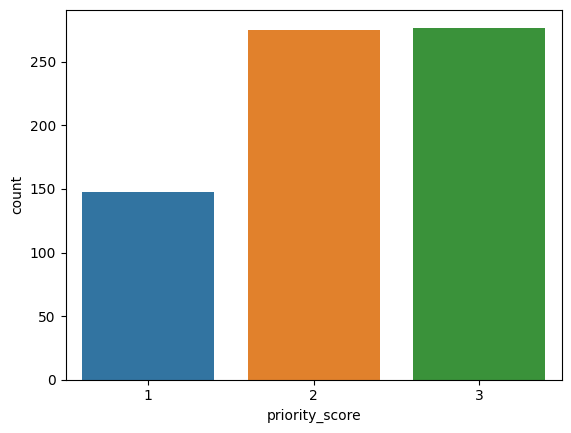

In [6]:
sns.countplot(x=df['priority_score']);

In [7]:
d={'1':0,'2':1,'3':2}

In [8]:
df['priority_score'] = df['priority_score'].astype(str)

In [9]:
d = {str(k):v for k,v in d.items()}

In [10]:
df['priority_score'] = df['priority_score'].map(d)

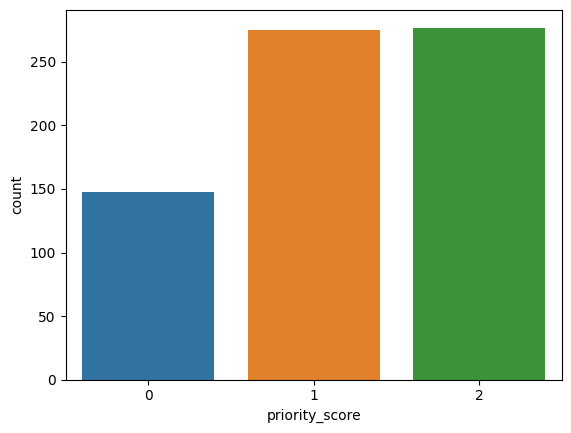

In [11]:
sns.countplot(x=df['priority_score']);

In [12]:
df.isnull().sum()

Unnamed: 0            0
content               0
translated_content    0
priority_score        0
problem_domain        0
dtype: int64

In [13]:
df['translated_content']=df['translated_content'].str.lower()
df['translated_content']=df['translated_content'].str.replace('[^\w\s]','',regex= True)
df['translated_content']=df['translated_content'].str.replace('\n','')
df['translated_content']=df['translated_content'].str.replace('\d+','', regex = True)
df['translated_content']=df['translated_content'].str.replace('\r','', regex = True)

In [14]:
df['translated_content']

0      sorry including the expensive price  apk using...
1       after installed the app stuck with white display
2      cannot submit the data verification even my in...
3                                the app keep restarting
4                     overpriced bad food too many flies
                             ...                        
695    please clean the mens bathrooms specifically f...
696                                              loading
697    would be nice if people could leave luggage af...
698    the mattress turned out to be really hardapart...
699                                              loading
Name: translated_content, Length: 700, dtype: object

In [15]:
from wordcloud import WordCloud 
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np

In [16]:
import matplotlib.pyplot as plt

In [17]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10)) 
    mask=np.array(Image.open('1000_F_326551425_4sH8heDBImd7VGGT8QFW7eQCOtUfewuZ.jpg'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(" ".join(data))
    plt.imshow(wc)
    plt.axis("off")

In [18]:
negativ=df[df['priority_score']==0]['translated_content']
middle=df[df['priority_score']==1]['translated_content']
good=df[df['priority_score']==2]['translated_content']

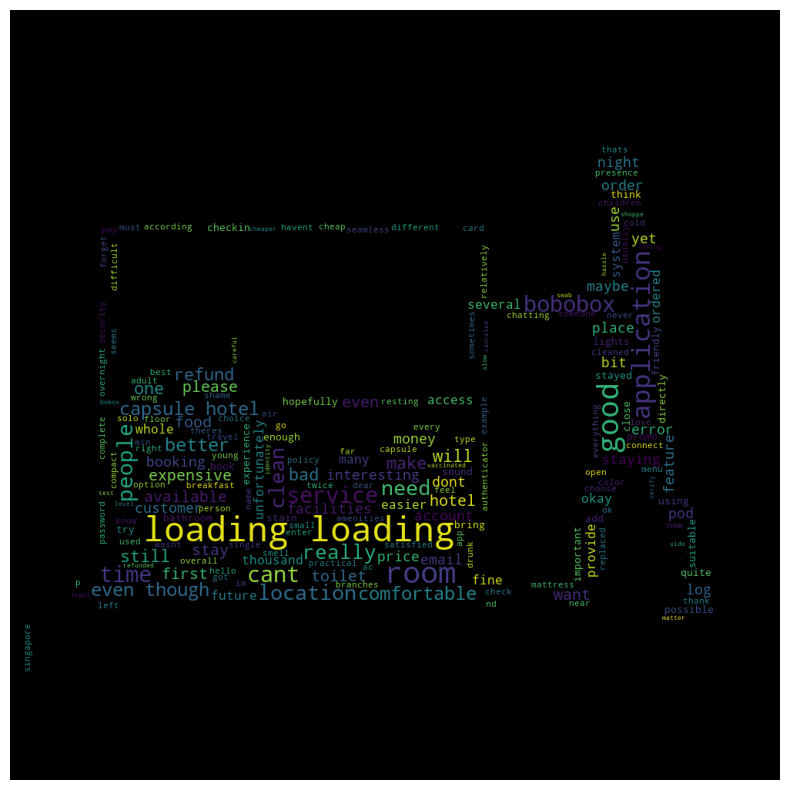

In [19]:
wc(negativ,'black')

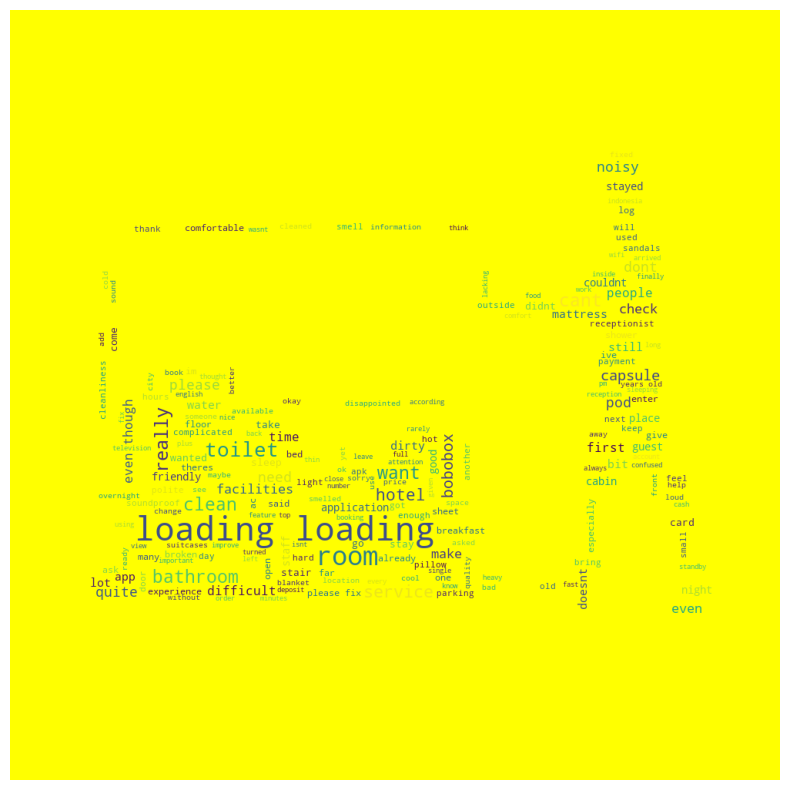

In [20]:
wc(middle,'yellow')

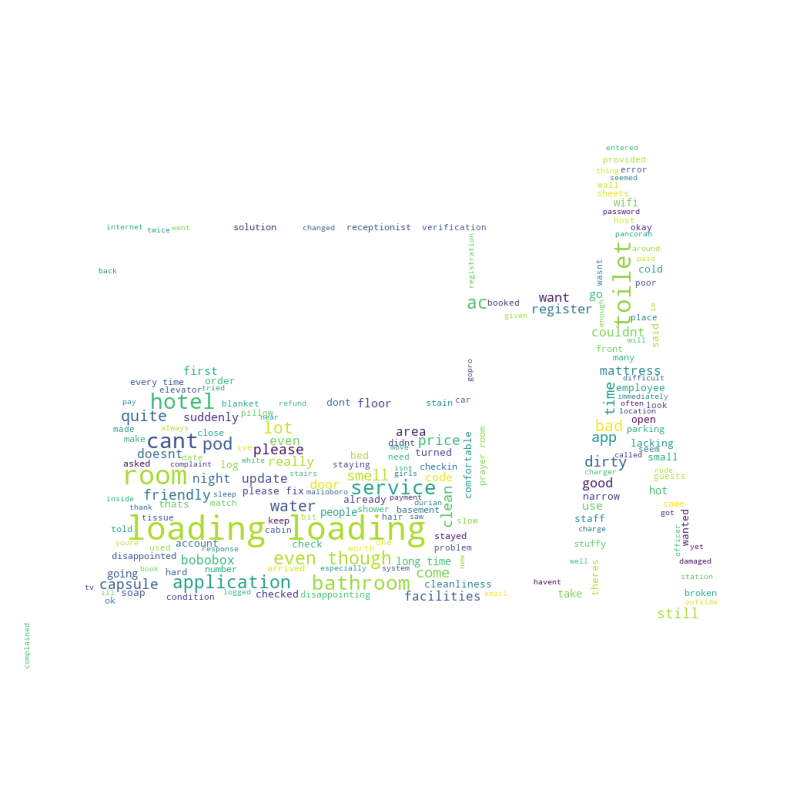

In [21]:
wc(good,'white')

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [23]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word)for word in words]

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2),analyzer=lemmafn)

In [26]:
x=df['translated_content']
y=df['priority_score']

In [27]:
x=vect.fit_transform(x)


# CNN

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten,Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.10,random_state=42)

In [31]:
model=Sequential()

model.add(Dense(32,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(18,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(3)) 
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [32]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=150,verbose=1)

Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3822 - loss: 1.0955 - val_accuracy: 0.4000 - val_loss: 1.0976
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3937 - loss: 1.0853 - val_accuracy: 0.4000 - val_loss: 1.0818
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4425 - loss: 1.0547 - val_accuracy: 0.4000 - val_loss: 1.0714
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4347 - loss: 1.0521 - val_accuracy: 0.4143 - val_loss: 1.0694
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4316 - loss: 1.0427 - val_accuracy: 0.4571 - val_loss: 1.0673
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5107 - loss: 1.0151 - val_accuracy: 0.4286 - val_loss: 1.0663
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4823 - loss: 0.9883 - val_accuracy: 0.4000 - val_loss: 1.0592
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5180 - loss: 0.9804 - val_accuracy: 0.3857 - v

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7841 - loss: 0.4082 - val_accuracy: 0.4714 - val_loss: 2.9469
Epoch 102/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7669 - loss: 0.4218 - val_accuracy: 0.4857 - val_loss: 2.9441
Epoch 103/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7957 - loss: 0.4215 - val_accuracy: 0.4857 - val_loss: 2.9710
Epoch 104/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7554 - loss: 0.4409 - val_accuracy: 0.4857 - val_loss: 2.9457
Epoch 105/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7927 - loss: 0.4105 - val_accuracy: 0.4857 - val_loss: 2.8655
Epoch 106/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7773 - loss: 0.4243 - val_accuracy: 0.4857 - val_loss: 3.0667
Epoch 107/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7672 - loss: 0.4242 - val_accuracy: 0.5000 - val_loss: 3.1031
Epoch 108/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7824 - loss: 0.4133 - val_accuracy: 0.4857 -

In [33]:
loss,accuracy=model.evaluate(x_test,y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.4636 - loss: 3.2717


In [34]:
accuracy

0.44285714626312256

In [35]:
tahmin=model.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [36]:
model.save('Text.h5')

In [37]:
import matplotlib.pyplot as plt

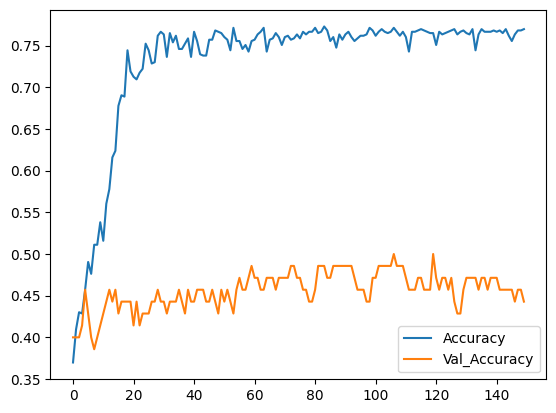

In [38]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend()

<Axes: >

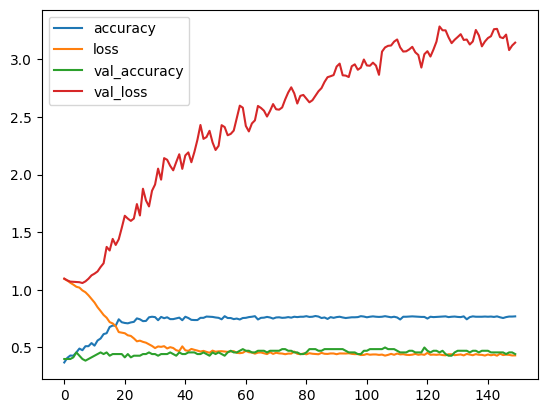

In [39]:
loss_f=pd.DataFrame(history.history)
loss_f.plot()

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [41]:
import numpy as np

In [42]:
confusion_matrix(y_test, np.argmax(tahmin, axis=1))

array([[ 4,  4,  3],
       [ 1, 22,  7],
       [ 3, 21,  5]])

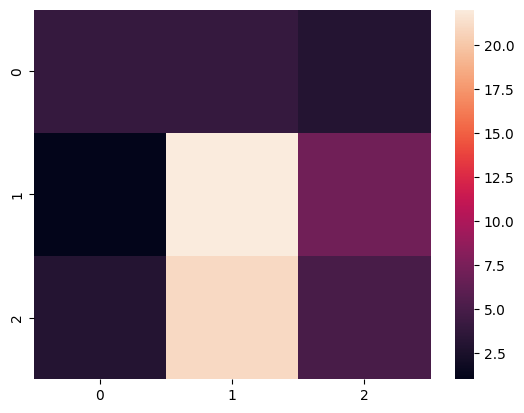

In [43]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, np.argmax(tahmin, axis=1)), annot=False);

In [44]:
print(classification_report(y_test, np.argmax(tahmin, axis=1)))

              precision    recall  f1-score   support

           0       0.50      0.36      0.42        11
           1       0.47      0.73      0.57        30
           2       0.33      0.17      0.23        29

    accuracy                           0.44        70
   macro avg       0.43      0.42      0.41        70
weighted avg       0.42      0.44      0.41        70



# Unfortunately, I could not get a good score here